In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
import Functions

In [2]:
# Load data and standardize
raw_df = pd.read_csv("./Dataset/Clean.csv")
scaled_df = Functions.standardize(raw_df)

In [16]:
eps_dist = Functions.calculate_kn_distance(scaled_df.to_numpy(), 17)

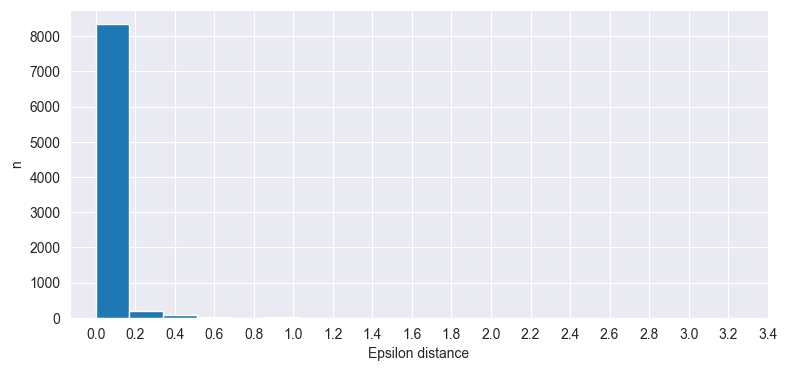

In [15]:
plt.figure(figsize=(10,4))
plt.hist(eps_dist,bins=15)
plt.ylabel('n')
plt.xlabel('Epsilon distance')
plt.xticks(np.arange(min(eps_dist), max(eps_dist)+1, 0.2))
plt.show()

In [17]:
db = DBSCAN(eps=0.3, min_samples=17).fit(scaled_df)
labels = db.labels_
number_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
label_counts = pd.Series(labels).value_counts()

print(label_counts)

-1    8243
 2     277
 0      63
 1      53
Name: count, dtype: int64


C:\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
-1       1623.727645           0.890031  1071.277955        632.876894   
 0        978.148351           1.000000   113.486667        113.088571   
 1        405.211718           1.000000   338.397170          0.000000   
 2       1302.135849           1.000000     0.065162          0.000000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
-1                   438.726989   1033.766896             0.512521   
 0                     0.398095      0.000000             0.095126   
 1                   338.397170      0.000000             0.993711   
 2                     0.065162    232.344022             0.000301   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

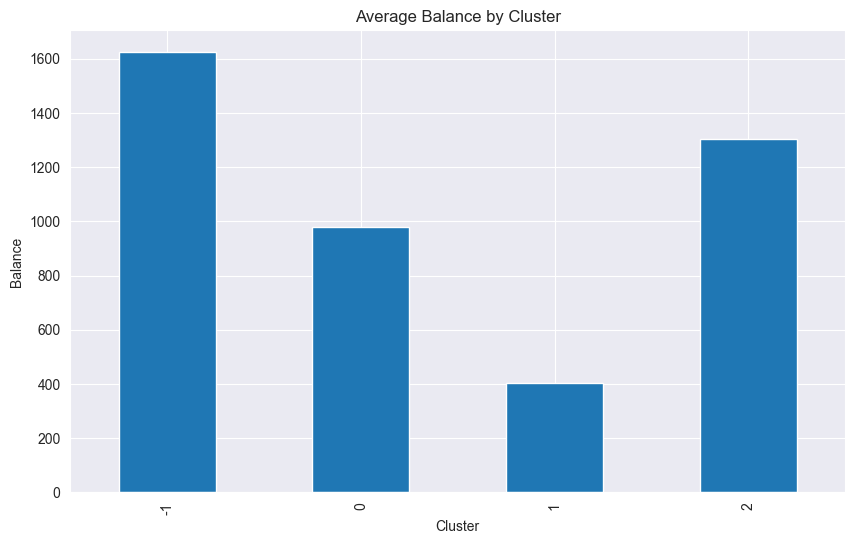

In [18]:
raw_df["Cluster"] = pd.Series(labels, index=raw_df.index)

cluster_summary = raw_df.groupby('Cluster').mean()

print(cluster_summary)

cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()

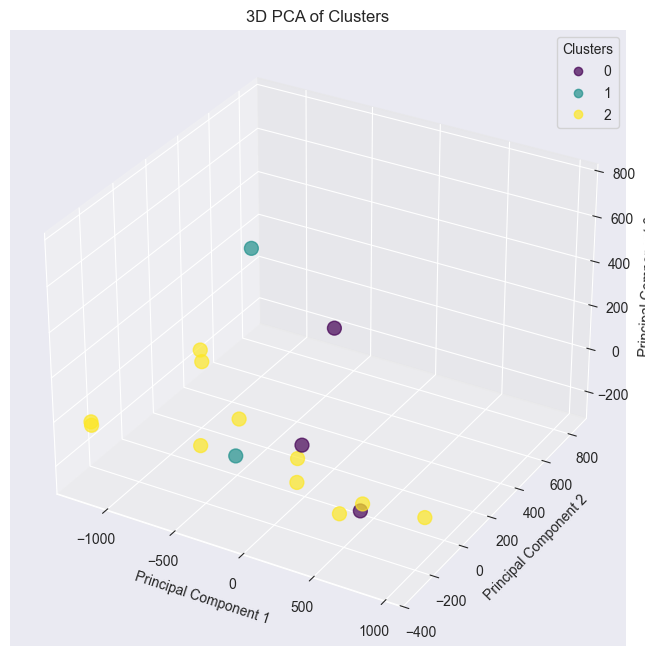

In [22]:
df = raw_df[raw_df['Cluster'] != -1].copy()
pca_df = Functions.pca(df,3)

#Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()